# Part II - Loan Data Analysis Presentation
## by Rawand Radi

## Investigation Overview


> This presentation shares the main findings from exploring the Prosper loan dataset. The goal is to understand how different borrower details (like income, rating, and loan term) relate to loan results, such as interest rates and loan status.

- Most loans are for 36 months, but 60-month loans have more defaults.
- Borrowers with a high debt-to-income ratio tend to get higher APRs.
- A better Prosper Rating usually means a lower interest rate.
- Lower-income borrowers are more likely to have charged-off loans.
- APR values are mostly below 0.4, but some go much higher.





## Dataset Overview and Executive Summary

> The dataset contains loan and borrower information from Prosper, including loan terms, borrower income, credit ratings, interest rates (APR), and loan statuses.

1. Loan Terms: Most loans have a term of 36 months, with fewer loans at 12 and 60 months.

2. Prosper Ratings: Higher ratings are linked to lower interest rates and better loan outcomes.

3. Income Range: Borrowers with lower income tend to have more loans that default or get charged off.

4. Debt-to-Income Ratio (DTI): Higher DTI ratios are associated with higher borrower APR.

5. Loan Status Distribution: Most loans are completed successfully, but some have statuses like charged off or late.



In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("clean_prosperLoanData.csv")
df.head(5)

,BorrowerAPR,ProsperRating (Alpha),ProsperScore,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,Term,LoanStatus,EmploymentStatus,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,IsBorrowerHomeowner
0,0.12016,A,7.0,"$50,000-74,999",6125.000000,10000,36,Current,Employed,0.18,680.0,699.0,False
1,0.12528,A,9.0,"$25,000-49,999",2875.000000,10000,36,Current,Employed,0.15,800.0,819.0,True
2,0.24614,D,4.0,"$100,000+",9583.333333,15000,36,Current,Employed,0.26,680.0,699.0,True
3,0.15425,B,10.0,"$100,000+",8333.333333,15000,60,Current,Employed,0.36,740.0,759.0,True
4,0.31032,E,2.0,"$25,000-49,999",2083.333333,3000,36,Current,Employed,0.27,680.0,699.0,False


## Visualization 1 : distribution of loan terms.

> This bar plot shows the count of loans for each loan term length in months,It helps us understand which loan durations are most common among borrowers.

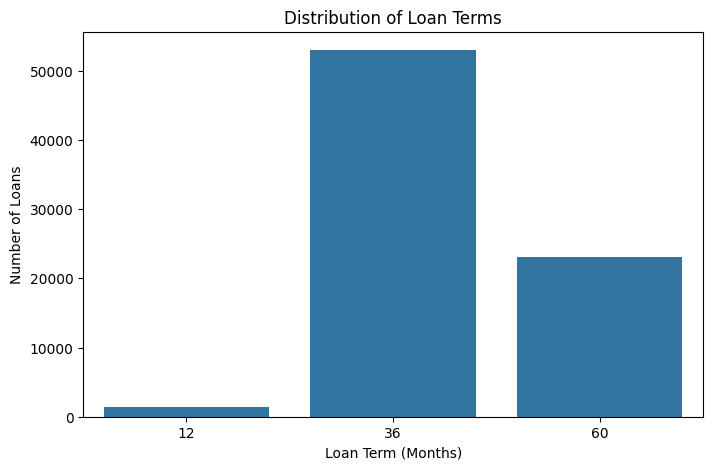

In [5]:
# The bars are colored uniformly for a formal look, and axes are clearly labeled
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Term', color='tab:blue')
plt.title('Distribution of Loan Terms')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Number of Loans')
plt.show()


This plot illustrates the distribution of loan terms requested by borrowers. The majority of loans have a term of 36 months, followed by 60 and 12 months. This insight highlights borrower preference for medium-term loans.

## Visualization 2 - Boxplot of Borrower APR by Prosper Rating

> this helps understand the relationship between creditworthiness and loan interest rates.

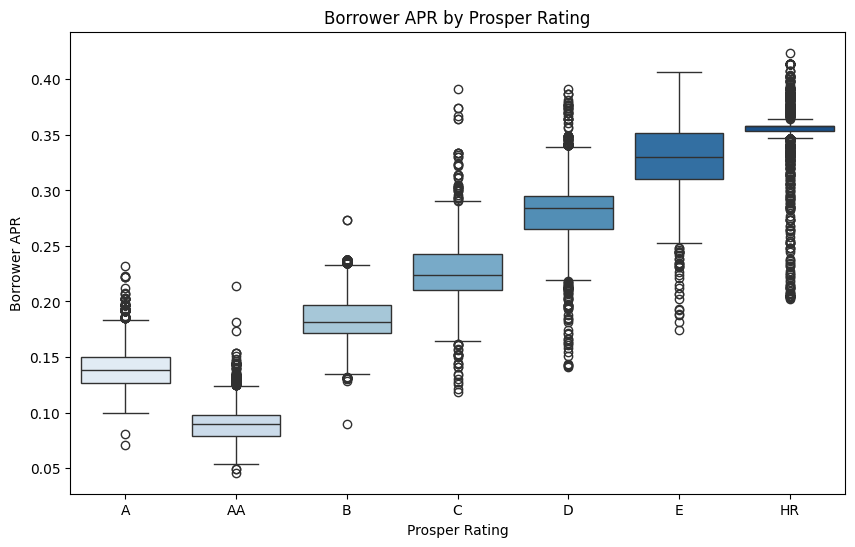

In [8]:
plt.figure(figsize=(10, 6))
# Get the unique Prosper Ratings sorted in order, ignoring missing values
order = sorted(df['ProsperRating (Alpha)'].dropna().unique())

sns.boxplot(data=df, x='ProsperRating (Alpha)', y='BorrowerAPR', order=order, palette='Blues')
# Add a title to the plot
plt.title('Borrower APR by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.show()


This plot shows how the Borrower APR changes with different Prosper Ratings. Higher ratings mean lower APRs, which means better credit gets cheaper loans. Lower ratings have higher APRs, showing more risk and higher loan costs.

## Visualization 3-Loan Status Distribution by Loan Term

In [5]:
statuses = df['LoanStatus'].dropna().unique()

def loan_status_rank(status):
    status = status.lower()
    if 'current' in status:
        return 0
    elif 'completed' in status:
        return 1
    elif 'finalpayment' in status:
        return 2
    elif 'past due' in status:
        # Extract day range, "1-15" or ">120"
        import re
        match = re.search(r'(\d+)', status)
        if match:
            return 3 + int(match.group(1))  # rank based on days
        elif '>120' in status:
            return 10_000
        else:
            return 9999
    elif 'charged' in status:
        return 999_999
    elif 'default' in status:
        return 1_000_000
    else:
        return np.inf

sorted_statuses = sorted(statuses, key=loan_status_rank)

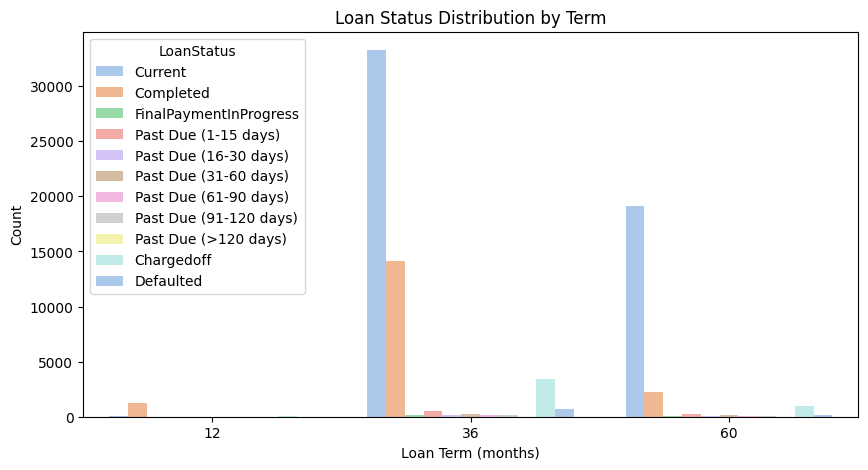

In [7]:
# Set figure size to make the plot wider and easier to read
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='Term',
    hue='LoanStatus',
    palette='pastel',
    hue_order=sorted_statuses
)
plt.title('Loan Status Distribution by Term')
# Label the x-axis to indicate loan term in months
plt.xlabel('Loan Term (months)')
# Label the y-axis to show the number of loans
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

This chart shows how loans are spread across different loan terms and their current status. We can see which loan durations have more completed loans and which have more defaults or late payments. This helps us understand if longer or shorter loans are more likely to be paid back on time or not. It’s useful for lenders to decide which loan terms are safer or riskier.